<a href="https://colab.research.google.com/github/panimesh14/Generative-Adersarial-Networks-GANs/blob/main/Simple_Generative_Adversarial_Networks_(GANs)_as_Generative_Models_for_MNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Generative Adversarial Networks (GANs) as Generative Models for MNIST Digits

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
#Using MNIST Digit Dataset
from tensorflow.keras.datasets import mnist
(Xtrain,ytrain),(Xtest,ytest)=mnist.load_data()

In [15]:
data=Xtrain[ytrain==4]#generating no. 4

In [25]:
data=Xtrain[ytrain==5]#generating and testing for performance on number 5 since mode collapse occurs for 4

In [26]:

#Image Dimensions 
imgnum,m,n=data.shape#Dimensions of actual/generated image
img_encoding_size=100;#Encoded dimension of image

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Reshape

In [28]:
#Discriminator
disc=Sequential()
disc.add(Flatten(input_shape=[m,n]))
disc.add(Dense(350,activation='relu'))
disc.add(Dense(165,activation='relu'))
disc.add(Dense(80,activation='relu'))
disc.add(Dense(1,activation='sigmoid'))
disc.compile(loss='binary_crossentropy',optimizer='adam')
disc.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f97642ce890>>

In [29]:
#Generator
gent=Sequential()
gent.add(Dense(int((m*n)/10)))
gent.add(Dense(int(m*n/5),activation='relu'))
gent.add(Dense(int(m*n/3),activation='relu'))
gent.add(Dense(int(m*n),activation='relu'))
gent.add(Reshape([m,n]))

In [30]:
gan=Sequential([gent,disc])
disc.trainable=False
gan.compile(loss='binary_crossentropy',optimizer='adam')
gan.layers[1].summary()
#layer 0 summary for generator not possible since not compiled

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 350)               274750    
                                                                 
 dense_17 (Dense)            (None, 165)               57915     
                                                                 
 dense_18 (Dense)            (None, 80)                13280     
                                                                 
 dense_19 (Dense)            (None, 1)                 81        
                                                                 
Total params: 346,026
Trainable params: 0
Non-trainable params: 346,026
_________________________________________________________________


In [31]:
#Converting to tensor pipeline
import tensorflow as tf
batch_size=30; 
dataset=tf.data.Dataset.from_tensor_slices(data).shuffle(buffer_size=1000)
dataset =dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [32]:
#Model Algorithm-alternative switch on switch off
epochs= 100
gen,dis=gan.layers;
for e in range(epochs):
    print('Epoch Number:',e+1);
    i=1;
    for batch_element in dataset:
        i=i+1;
        if(i%100==0):
           print("Currently on batch number of dataset=",i)
        #Discriminator active trainable
        gen_noise=tf.random.normal(shape=[batch_size,img_encoding_size])
        fake_img=gen(gen_noise);
        #print(gen_noise.shape)
        #break;
        #training Data for discriminator
        X=tf.concat([fake_img,tf.dtypes.cast(batch_element,tf.float32)],axis=0)
        #Target Labels for discriminator 
        y_disc=tf.constant([0.0]*(batch_size)+[1.0]*(batch_size))
        dis.trainable=True
        dis.train_on_batch(X,y_disc)
        
        #Generator active trainable
        #generator input training data
        gen_noise=tf.random.normal([batch_size,img_encoding_size])
        y_gen=tf.constant([1.0]*(batch_size))
        dis.trainable=False
        gan.train_on_batch(gen_noise,y_gen)
        #gen_img=gen(gen_noise)        
        #plt.figure(figsize=(12,8))
        #for i in range(10):
        #    plt.subplot(2,5,i+1)
        #    plt.imshow(gen_img[i*3])
        #    plt.title(i*3)

Epoch Number: 1
Currently on batch number of dataset= 100
Epoch Number: 2
Currently on batch number of dataset= 100
Epoch Number: 3
Currently on batch number of dataset= 100
Epoch Number: 4
Currently on batch number of dataset= 100
Epoch Number: 5
Currently on batch number of dataset= 100
Epoch Number: 6
Currently on batch number of dataset= 100
Epoch Number: 7
Currently on batch number of dataset= 100
Epoch Number: 8
Currently on batch number of dataset= 100
Epoch Number: 9
Currently on batch number of dataset= 100
Epoch Number: 10
Currently on batch number of dataset= 100
Epoch Number: 11
Currently on batch number of dataset= 100
Epoch Number: 12
Currently on batch number of dataset= 100
Epoch Number: 13
Currently on batch number of dataset= 100
Epoch Number: 14
Currently on batch number of dataset= 100
Epoch Number: 15
Currently on batch number of dataset= 100
Epoch Number: 16
Currently on batch number of dataset= 100
Epoch Number: 17
Currently on batch number of dataset= 100
Epoch 

Text(0.5, 1.0, 'Generated Image from Noise Encoding')

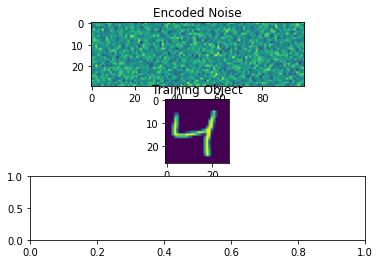

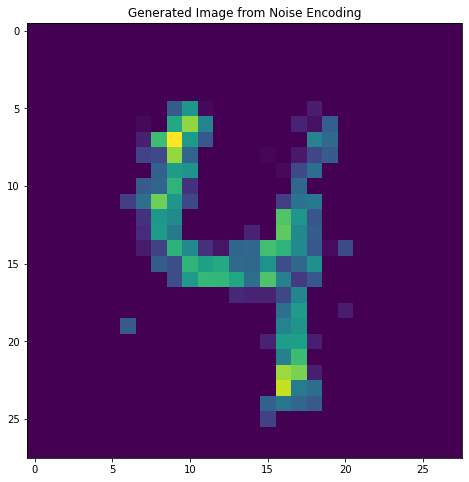

In [23]:
#plt.figure(figsize=(12,8))
noisy_img=tf.random.normal([batch_size,img_encoding_size])
gen_img=gen(noisy_img)
plt.subplot(3,1,1)
plt.imshow(noisy_img)
plt.title('Encoded Noise')

plt.subplot(3,1,2)
#plt.figure(figsize=(12,8))
plt.imshow(data[0])
plt.title('Training Object')

plt.subplot(3,1,3)
plt.figure(figsize=(12,8))
plt.imshow(gen_img[2])
plt.title('Generated Image from Noise Encoding')

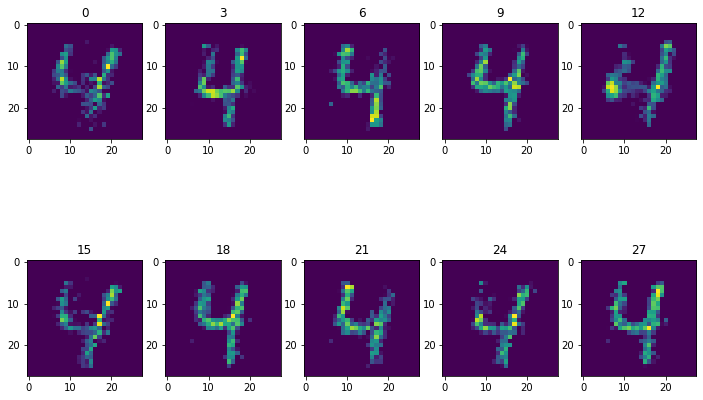

In [24]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(gen_img[i*3])
    plt.title(i*3)
#Mode Collapse occurs for number 4 where generator generates similar images to dol the discriminator

Text(0.5, 1.0, 'Generated Image from Noise Encoding')

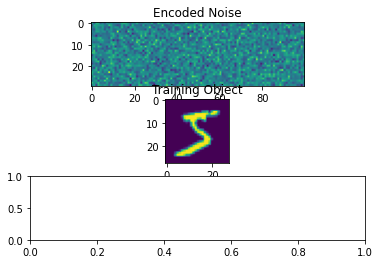

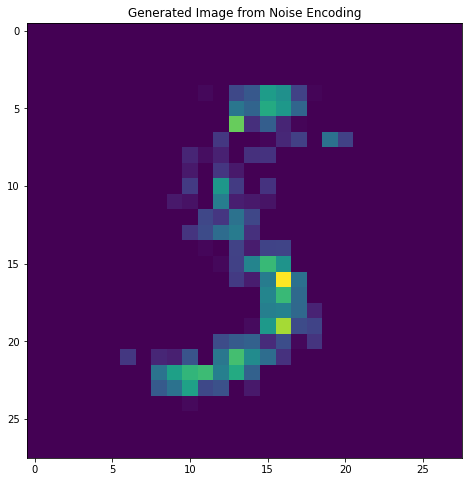

In [33]:
#Number 5
#plt.figure(figsize=(12,8))
noisy_img=tf.random.normal([batch_size,img_encoding_size])
gen_img=gen(noisy_img)
plt.subplot(3,1,1)
plt.imshow(noisy_img)
plt.title('Encoded Noise')

plt.subplot(3,1,2)
#plt.figure(figsize=(12,8))
plt.imshow(data[0])
plt.title('Training Object')

plt.subplot(3,1,3)
plt.figure(figsize=(12,8))
plt.imshow(gen_img[2])
plt.title('Generated Image from Noise Encoding')

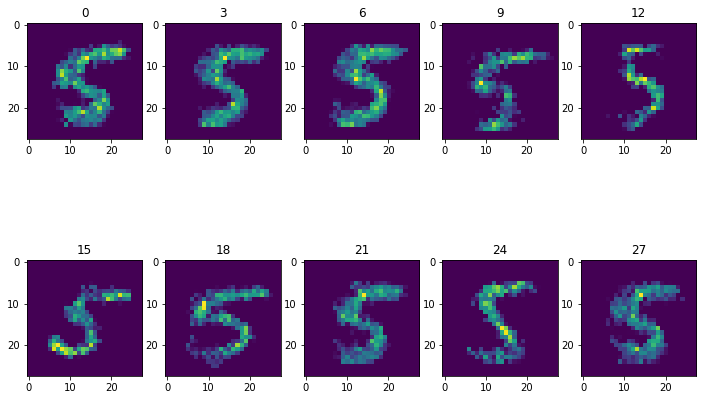

In [34]:
#For NUMBER 5
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(gen_img[i*3])
    plt.title(i*3)
#Generated Images show visibly slightly more diversity than for number 4 but still appear to fall prey to mode collapse